# Semantic Spotter AI  --> Using Llama Index building a robust generative search system capable of effectively and accurately answering questions from various policy documents.

 <font color = red>  Submitted by - Dipak Sah, MLAI C60 Batch

# Project Description

## Objective
The goal of the project will be to build a robust generative search system capable of effectively and accurately answering questions from various policy documents. We have to chose LangChain or LlamaIndex to build the generative search application.

# RAG using LlamaIndex



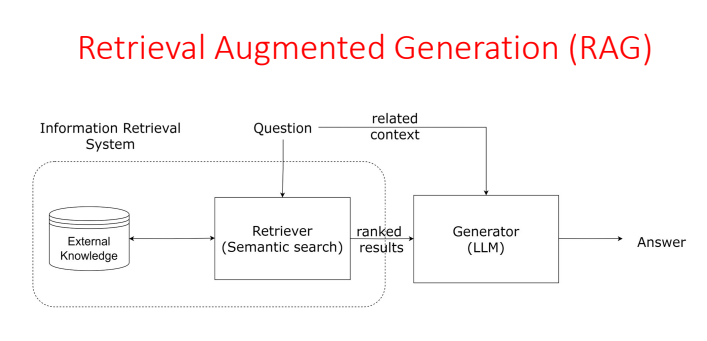

### RAG
**Retrieval-Augmented Generation** (RAG) is a method that improves the responses of a language model by using information from a knowledge base. It's like giving the model a library of information to reference when it's generating a response. This makes the model's responses more accurate and relevant.

RAG combines two types of models:
- ***retrieval models***, which pull data from a knowledge base, and
- ***generative models*** , which create the responses.

This combination makes RAG more powerful than a model that only generates responses. It can answer difficult questions and provide more informative responses.

### **About LlamaIndex**
**LlamaIndex** is a framework for building context-augmented LLM applications. Context augmentation refers to any use case that applies LLMs on top of your private or domain-specific data.

Some popular use cases include the following:
* Question-Answering Chatbots (commonly referred to as RAG, or "Retrieval-Augmented Generation")
* Document Understanding and Extraction
* Autonomous Agents that can perform research and take actions

LlamaIndex provides the tools to build any of these above use cases from prototype to production. The tools allow you to ingest and process this data and implement complex queries. It combines data access with LLM prompting.

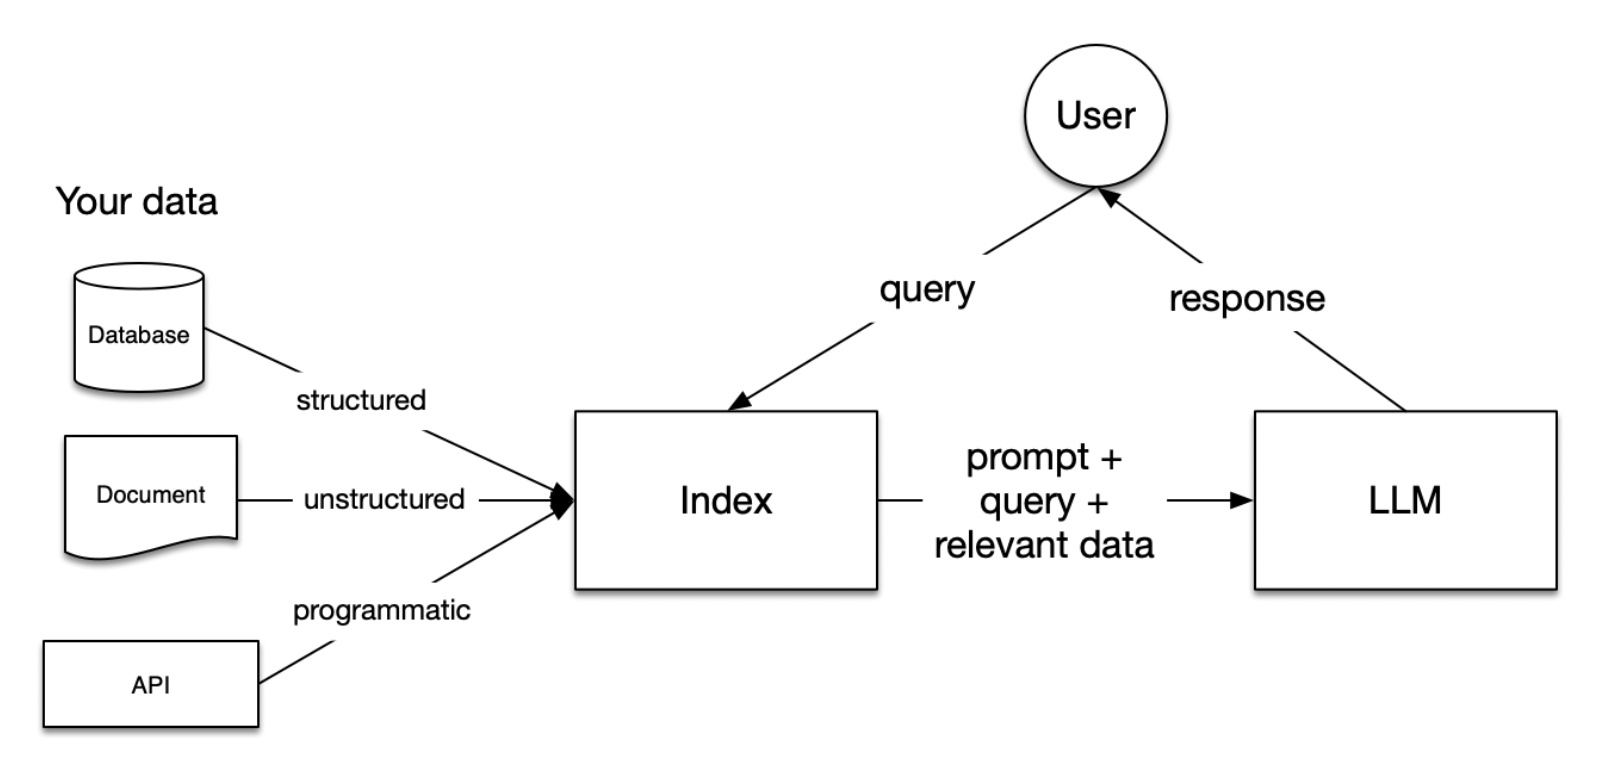

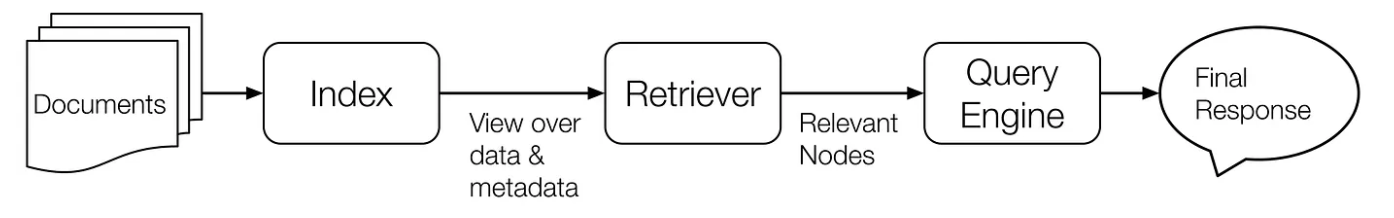

To install the library:

`pip install llama-index`

## **Why LlamaIndex**

LlamaIndex is indeed an innovative framework tailored for integrating various data sources with large language models (LLMs). It plays a critical role in the development of Retrieval Augmented Generation (RAG) applications, which combine retrieval systems and generative models to provide accurate and contextually relevant responses.

### Here are some key features and benefits of LlamaIndex:

1. Integration with LLMs:

Easily integrates with large language models to enhance their capabilities with diverse data sources.

2. Support for Multiple Data Sources:

Allows developers to connect to various data repositories, such as databases, document stores, and APIs.

3. Improved Data Retrieval:

Facilitates efficient data retrieval, ensuring that the most relevant information is fetched to support the generative models.

4. Enhanced Application Development:

Provides tools and components that simplify the development of complex RAG applications, making it easier for developers to build robust systems.

5. Customization and Flexibility:

Offers a customizable framework that can be adapted to specific project needs, allowing for a tailored approach to data integration and generation.

LlamaIndex truly empowers developers to build advanced applications that can handle a wide range of data and deliver precise answers. **Considering our project to build RAG on insurance domain, it is an excellent choice**.

## Solution Flow

1. Install and Import necessary libraries.
2. Read Insurance PDF Files
3. Create Nodes and Index
4. Create Retriver and Query Engine
5. Simulate the search

### 1. Import the necessary libraries

In [ ]:
!pip install -U -qq openai llama-index llama-index-core llama-index-readers-file llama-index-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install -qq pypdf


In [ ]:
# To use emdedding model from huggingface
%pip install -qq llama-index-embeddings-huggingface
%pip install -qq llama-index-embeddings-instructor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
# NOTE: This is ONLY necessary in jupyter notebook.
# Details: Jupyter runs an event-loop behind the scenes.
# This results in nested event-loops when we start an event-loop to make async queries.
# This is normally not allowed, we use nest_asyncio to allow it for convenience.
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# Llama index already has its bundle which comes with OpenAI package included and will work even if you do not import openai separately.
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

In [ ]:
# Importing other libraries
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.response_synthesizers import ResponseMode
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core import get_response_synthesizer
from llama_index.core.postprocessor import SimilarityPostprocessor
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex, Settings, SimpleDirectoryReader
from IPython.display import display, HTML
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import load_index_from_storage,StorageContext

###  Mount your Google Drive and Set the API key

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
# Set the API key
filepath = '/content/drive/MyDrive/GenAI/'

# Read the OpenAI API key
with open(filepath + "OpenAI_API_Key.txt","r") as f:
  openai.api_key = ' '.join(f.readlines())

In [ ]:
os.chdir(filepath)

Let's check if the OpenAI API is working correctly

In [ ]:
messages = [
    ChatMessage(role="system", content="You are an AI assistant to the user."),
    ChatMessage(role="user", content="What is the annual revenue of Tata Motors in 2021?")
]
resp = OpenAI().chat(messages)
print(resp)

assistant: The annual revenue of Tata Motors in 2021 was approximately $30.3 billion.


### 2 - Read Insurance PDF Files

Before LLM can act on your data, we need to process and load it. The way LlamaIndex does this is via data connectors, also called `Reader`. Data connectors ingest data from different data sources and format the data into `Document` objects. A `Document` is a collection of data (currently text, and in future, images and audio) and metadata about that data.


***3 ways to do this***

- If you have a single file containing all the required data, use a data loader or reader from [LLamahub](https://llamahub.ai/)
    https://llamahub.ai/l/readers/llama-index-readers-file

- If you have multiple files, the simplest way is to use *SimpleDirectoryReader*. It is built in to LlamaIndex and can read a variety of formats including Markdown, PDFs, Word documents, PowerPoint decks, images, audio and video. Just ensure that for reading each file type the necessary dependency libraries are already installed.
    https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader.html

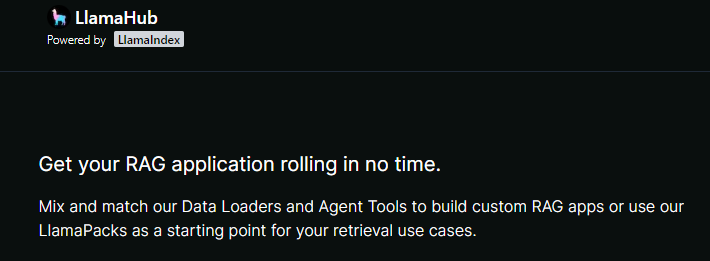

##### Using SimpleDirectoryReader
Here are some attributes that can be passed to the `SimpleDirectoryReader`:

* `input_dir`: The directory from which you have to load files.
* `recursive`: If set to *True*, it will read files from subdirectories too.
* `input_files`: A list of specific file paths to load.
* `exclude`: A list of file paths to exclude.

Refer to [this documentation](https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader/) for more info on SimpleDirectoryReader


In [ ]:
# Let us take input from a directory using SimpleDirectoryReader
reader = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/GenAI/insurance_docs")

We have read all these 7 HDFC Insurance files shown below.
 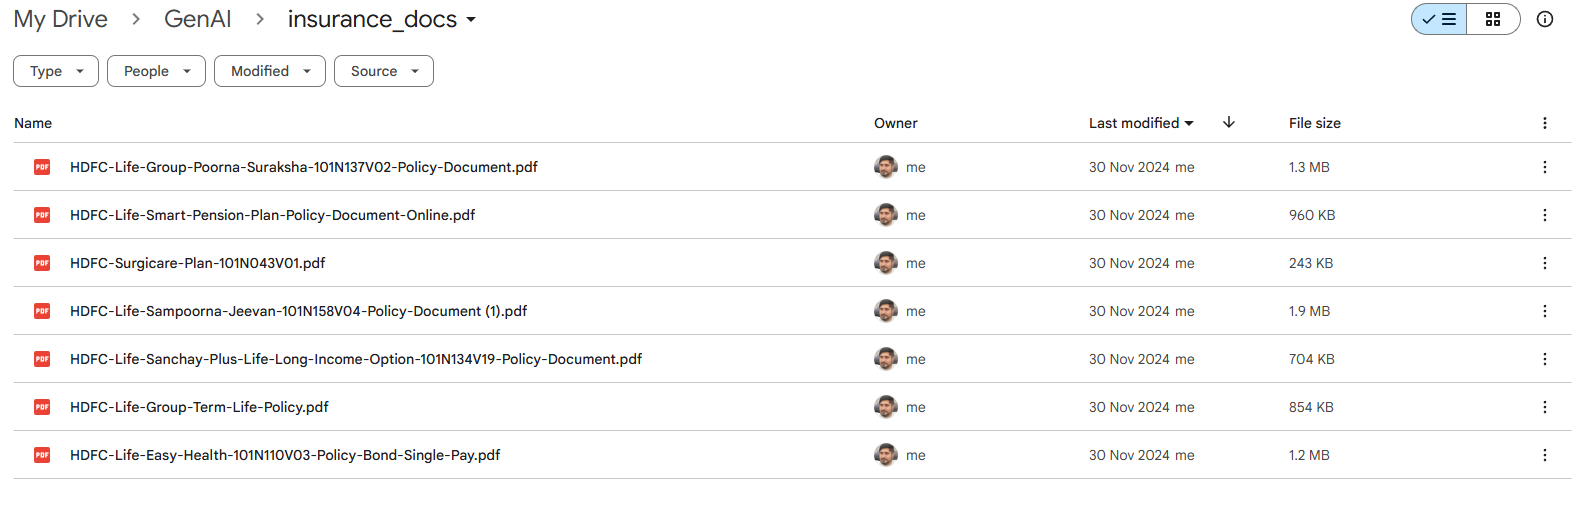

In [ ]:
# Use the load_data() method to read the files from the directory
documents = reader.load_data()
# number of files
print(f"Loaded {len(documents)} docs")

Loaded 217 docs


In [ ]:
type(documents)

list

Note: <br>

There are total 7 PDF files but 217 here is total number of pages from these 7 files. One document represents one page and it is stored as list.

In [ ]:
# browsing one page to visualize
documents[0]

Document(id_='9b48719a-4b94-4ab0-b31e-0a3dd8969822', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/GenAI/insurance_docs/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-12-22', 'last_modified_date': '2024-11-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text=' \n \n            Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>> \n \nDear <<Policyholder’s Name>>,  \n \nSub: Your Poli

### 3 Create Nodes and Index

#### Documents and Nodes
 <br>
Document and Node objects are core abstractions within LlamaIndex.

A **Document** is a generic container around any data source - for instance, a PDF, an API output, or retrieved data from a database. They can be constructed manually, or created automatically via data loaders. By default, a Document stores text along with some other attributes. Some of these are

<br>

A **Node** represents a "chunk" of a source Document, whether that is a text chunk, an image, or other. Similar to Documents, they contain metadata and relationship information with other nodes.

Nodes are a first-class citizen in LlamaIndex. You can choose to define Nodes and all its attributes directly. You may also choose to "parse" source Documents into Nodes through our `NodeParser` classes. By default every Node derived from a Document will inherit the same metadata from that Document (e.g. a "file_name" filed in the Document is propagated to every Node).

Both Documents and Nodes have unique identifies called `ID`. These can be set automatically or manually. `ID` is generally used to identify, update, and define relationships between documents (or nodes).

For additional reading: [LlamaIndex Documentation](https://docs.llamaindex.ai/en/stable/module_guides/loading/documents_and_nodes/#documents-nodes)


**Node Parser**: [Node parsers](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#node-parser-modules) chunk a document into nodes. There are several file-based node parsers, that will create nodes based on the type of content that is being parsed (JSON, Markdown, etc.)

However, for better manageability and efficiency in parsing, you can first split the text. This is done using splitters.<br>
**Splitters** are responsible for breaking down the text into smaller, manageable pieces, often called chunks or nodes. These chunks can be based on various criteria such as sentence boundaries, semantic similarity, or other custom rules.

#### Index
An `Index` is a data structure that allows us to quickly retrieve relevant context for a user query. For LlamaIndex, it's the core foundation for RAG use-cases.

At a high-level, `Indexes` are built from Documents. They are used to build Query Engines and Chat Engines which enables question & answer and chat over your data.

Under the hood, Indexes store data in Node objects, and expose a Retriever interface that supports additional configuration and automation.

The most common index by far is the VectorStoreIndex.

##### Using VectorStoreIndex#
Vector Stores are a key component of RAG and so you will end up using them in nearly every application you make using LlamaIndex, either directly or indirectly.

Vector stores accept a list of Node objects and build an index from it.
<br>

**Loading data into the index**

The simplest way to use a Vector Store is to load a set of documents and build an index from them using from_documents:

Tip:

If you are using `from_documents` on the command line, it can be convenient to pass `show_progress=True` to display a progress bar during index construction.

When you use `from_documents`, your Documents are split into chunks and parsed into Node objects, lightweight abstractions over text strings that keep track of metadata and relationships.

In [ ]:
# We are using huggingface embedding model during creation of index for the documents loaded
# loads BAAI/bge-small-en-v1.5
# intilaize our custom embeddings
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

# Create a ServiceContext object with default configurations
# This context incorporates required settings and services for generating vector representations

Settings.embed_model = embed_model


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Defining parser to parse the document loaded
parser = SimpleNodeParser.from_defaults(chunk_size = 1024, chunk_overlap = 128)

In [ ]:
# Creating nodes ie chunks using above defined parser
nodes = parser.get_nodes_from_documents(documents)

In [ ]:
import os.path

We store the vector index in our hard disk so that we generate it once and resue it by loading from storage.

In [ ]:
# using vectorstoreindex creating index from nodes
# check if storage already exists
PERSIST_DIR = "./storage"
if not os.path.exists(PERSIST_DIR):
    index = VectorStoreIndex(nodes)
    # store it for later
    index.storage_context.persist(persist_dir=PERSIST_DIR)
    print("Generating Index")
else:
    # load the existing index
    storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
    index = load_index_from_storage(storage_context)
    print("Loading Index from Storage")

Loading Index from Storage


# 4 Create Retriever and Query Engine

#### Retrievers and ResponseSynthesizers
**Retrievers** are responsible for fetching the most relevant context given a user query (or chat message).

It can be built on top of indexes, but can also be defined independently. It is used as a key building block in query engines (and Chat Engines) for retrieving relevant context.

**ResponseSynthesizers** generate a response from an LLM, using a user query and a given set of text chunks. The output of a response synthesizer is a Response object.


In [ ]:
# Defining retriever on the vector index
retriever = VectorIndexRetriever(index = index, similarity_top_k = 3)

In [ ]:
# Initialize an OpenAI language model (llm) with specific configurations
llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)
Settings.llm = llm

In [ ]:
# Defining synthesizer for the response
synthesizer = get_response_synthesizer(response_mode="compact")

#### Query Engines
Query engine is a generic interface that allows you to ask question over your data.

A query engine takes in a natural language query, and returns a rich response. It is most often (but not always) built on one or many indexes via retrievers. You can compose multiple query engines to achieve more advanced capability.

In [ ]:
# construct query engine
query_engine = RetrieverQueryEngine(
    retriever = retriever,
    response_synthesizer = synthesizer
)

In [ ]:
# test the qery engine with sample query
response = query_engine.query("what are benefits of HDFC Life Group Poorna Suraksha?")

In [ ]:
display(HTML(response.response))

In [ ]:
# Visualizing the engine's response in better way
from llama_index.core.response.pprint_utils import pprint_response
pprint_response(response,show_source=True)
print(response)

Final Response: The benefits of HDFC Life Group Poorna Suraksha
include coverage under a Non-Linked Non-Participating Group Term
Insurance Policy, timely payment of benefits to the Master
Policyholder or nominee of the Scheme Member, and adherence to the
applicable laws in India.
______________________________________________________________________
Source Node 1/3
Node ID: 22f0efc9-265b-4e5a-9b15-304895f013d8
Similarity: 0.7307792252213778
Text: Page 3 of 31    POLICY SCHEDULE    1. Master Policy Number:<<
system/operations generated>>  2. Date of Proposal:<<<<
system/operations generated>>  3. Date of Inception: <<Date of
Inception>>  4. Effective Date:<< system/operations service
generated>>  5. Master Policyholder:<<Name of Company/Group>>  6. Name
of the Scheme:<<NAME of Scheme>>  7...
______________________________________________________________________
Source Node 2/3
Node ID: 1fe3c96d-e84e-49c6-aa95-fd5619c0b94e
Similarity: 0.7234853965322053
Text: Page 1 of 31    Part A  <<Da

In [ ]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='22f0efc9-265b-4e5a-9b15-304895f013d8', embedding=None, metadata={'page_label': '3', 'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_path': '/content/drive/MyDrive/GenAI/insurance_docs/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_type': 'application/pdf', 'file_size': 1371541, 'creation_date': '2024-12-22', 'last_modified_date': '2024-11-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='38127646-68eb-471c-84ee-01b7953d8eaf', node_type='4', metadata={'page_label': '3', 'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'file_path': '/content/drive/MyDrive/GenAI/insurance_docs/HDFC-L

# 5 Simulate the search

In [ ]:
!pip install diskcache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
import diskcache as dc

cache = dc.Cache('./gpt_cache')

In [ ]:
## Query response function using cache
def query_response(user_input):
  final_response=""
  cache_response=None
  cache_response=cache.get(user_input)
  if cache_response is not None:
    final_response=cache_response
    print("Response from Cache:\n")
  else:
    response = query_engine.query(user_input)
    print("Response from Engine:\n")
    file_name = response.source_nodes[0].node.metadata['file_name']
    page_no = response.source_nodes[0].metadata['page_label']
    final_response = response.response + '\nCheck further at ' + file_name + ' document ' +'page no ' + page_no
    cache.set(user_input,final_response)
  return final_response

In [ ]:
print(query_response("what are HDFC Life Sanchay Plus Life Long Income Option ?"))

Response from Cache:

HDFC Life Sanchay Plus Life Long Income Option is a non-participating, non-linked savings insurance plan offered by HDFC Life Insurance Company Limited. It provides various benefits such as Maturity Benefit, Death Benefit, and Guaranteed Income on Maturity. The plan allows for receiving guaranteed income starting from a certain year until the individual attains age 99 years, in arrears on payment of all due premiums. Additionally, on the Maturity Date, there is an option to receive the Guaranteed Sum Assured on Maturity, which is the present value of future payouts discounted at a specific rate. In case of death during the Payout Period, the Nominee can continue receiving the Guaranteed Income on Maturity or opt for a lump sum payment.
Check further at HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf document page no 17


In [ ]:
# defining function which can ask query from user and search the response.
def initialize_conv():
  print('Feel free to ask Questions regarding Uber financial document. Press exit once you are done')
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the search... bye bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px;color:blue">{response}</p>'))

In [ ]:
# 1st search
initialize_conv()

Feel free to ask Questions regarding Uber financial document. Press exit once you are done
what are the benefits of HDFC Sampoorna-Jeevan insurance?


exit
Exiting the search... bye bye


In [ ]:
# 2nd search
initialize_conv()

Feel free to ask Questions regarding Uber financial document. Press exit once you are done
What will happen if premium not paid on time for HDFC Surgicare Plan ?


exit
Exiting the search... bye bye


In [ ]:
# 3rd search
initialize_conv()

Feel free to ask Questions regarding Uber financial document. Press exit once you are done
Is there any age limit for HDFC Life Smart pension Plan ?


exit
Exiting the search... bye bye


In [ ]:
# 4th search
initialize_conv()

Feel free to ask Questions regarding Uber financial document. Press exit once you are done
Is blindness covered in HDFC Life Easy Health Policy ?


exit
Exiting the search... bye bye


In [ ]:
# 5th search
initialize_conv()

Feel free to ask Questions regarding Uber financial document. Press exit once you are done
What is the timeline to cancel HDFC Life Sanchay Plus Life Long Income Option plan, in case of any dissatisfaction ?


exit
Exiting the search... bye bye
